In [1]:
!pip install keras-ocr
import keras_ocr
import cv2
import matplotlib.pyplot as plt
import  time

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 603.5/603.5 KB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.6/285.6 KB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 3.7 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.19.0-py3-none-any.whl size=19553 sha256=ff22c3a125bcef37895f019902439407af4264ae3d87596e2150198b5118f80a
  Stored in directory: /root/.cache/pip/wheels/fe/5d/69/ff53a908b9f14fb7730a58fdede0fac4cdc99ef3624ec76d05
Successfully built validators


Looking for /root/.keras-ocr/craft_mlt_25k.h5


2022-05-23 06:57:34.437221: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Looking for /root/.keras-ocr/crnn_kurapan.h5


2022-05-23 06:57:38.101447: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


____________________________________________________________________________________________________
keras_ocr_time is: 14.672110080718994
____________________________________________________________________________________________________
amanda gorman us call what we carry 

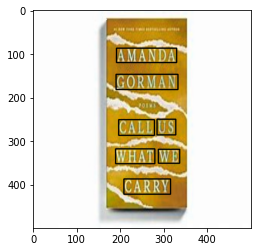

In [2]:

img = cv2.imread(r"../input/test-image/test_image.jpg")
img=cv2.resize(img,(500,500))


time_1 = time.time()

pipeline = keras_ocr.pipeline.Pipeline()
prediction_groups = pipeline.recognize([img])
predicted_image_1 = prediction_groups

words=[]

for i,text in enumerate(predicted_image_1):
     for text in text:
            words.append([[int(text[1][0][0]),int(text[1][2][0]),int(text[1][0][1]),int(text[1][2][1])],text[0]])
            img=cv2.rectangle(img, (int(text[1][0][0]), int(text[1][0][1])), (int(text[1][2][0]),int(text[1][2][1])), (0,0,0), 2)


time_2 = time.time()
print('_'*100)
keras_ocr_time = time_2 - time_1
print(f'keras_ocr_time is: {keras_ocr_time}')

print('_'*100)
plt.imshow(img)
for word in words:
    print(word[1],end=" ")


In [3]:
import pytesseract


a e W a a ~ ____________________________________________________________________________________________________
pytesseract_time is: 0.4020113945007324


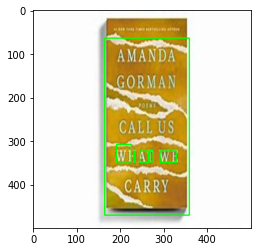

In [4]:
img = cv2.imread(r"../input/test-image/test_image.jpg")



h, w, _ = img.shape # assumes color image
time_1 = time.time()

# run tesseract, returning the bounding boxes
boxes = pytesseract.image_to_boxes(img) # also include any config options you use

# draw the bounding boxes on the image
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
    print(b[0],end=" ")
time_2 = time.time()

print('_'*100)
pytesseract = time_2 - time_1
print(f'pytesseract_time is: {pytesseract}')

plt.imshow(img)

In [5]:
#Conclusion
#1-we can note ocr_keras is more accurate than pytesseract
#2-pytesseract is very fast than ocr_keras 
